# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'train.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [816]:
def num_nans(df):
    return (df.isnull().any(axis=1)).sum()

print("There are " + str(num_nans(df)) + " rows with at least one empty value.")


There are 708 rows with at least one empty value.


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [817]:
def drop_na(df):
    # Use the dropna method to remove columns with more than 200 NaN values
    df = df.dropna(axis=1, thresh=len(df) - 200)
    return df

df = drop_na(df)
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [818]:
def to_numerical(df):
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    return df['Sex']

# Assuming you already have a DataFrame 'df', you can use the function like this:
df['Sex'] = to_numerical(df)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [819]:
def extract_names(df):
    last_name_and_rest = df['Name'].str.split(',', expand=True)
    
    df['Last Name'] = last_name_and_rest[0].str.strip()
    
    title_and_names = last_name_and_rest[1].str.split('.', expand=True)
    
    df['Title'] = title_and_names[0].str.strip()
    
    first_and_middle_name = title_and_names[1].str.split(' ', n=2, expand=True)
    
    df['First Name'] = first_and_middle_name[1].str.strip()
    
    df['Middle Name'] = first_and_middle_name[2].str.strip()
    
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [820]:
def replace_with_mean(df):
    avgAge = df['Age'].mean()
    return df['Age'].replace({"None": avgAge})
    

df['Age'] = replace_with_mean(df)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

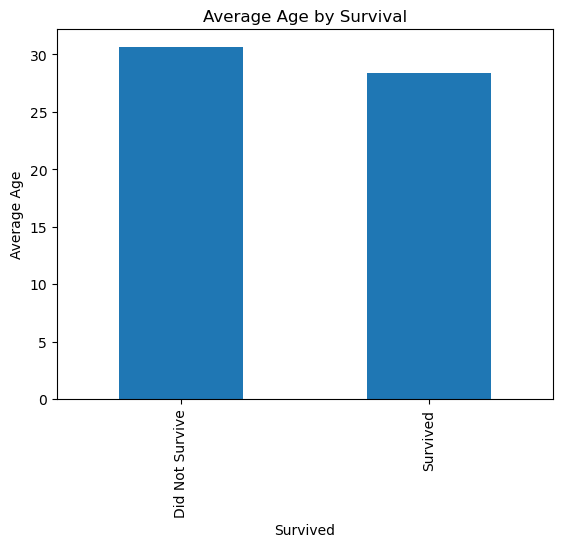

In [821]:
# your code here

import pandas as pd
import matplotlib.pyplot as plt
age_by_survival = df.groupby('Survived')['Age'].mean()

age_by_survival.plot(kind='bar')
plt.title('Average Age by Survival')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Average Age')
plt.show()


From my observations I realize that the average of survivors was less than the average of non-survivors.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

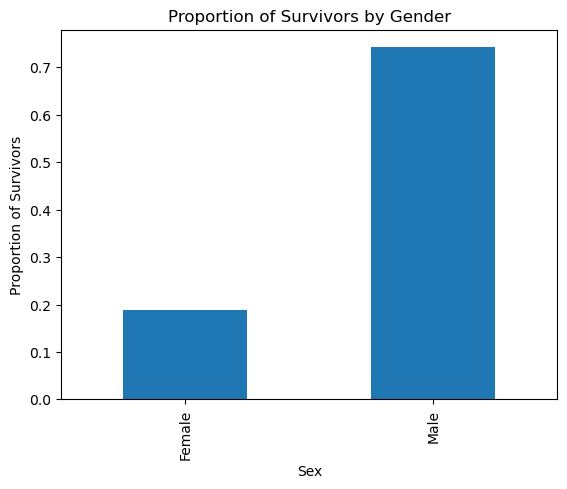

In [822]:
# your code here
survival_proportion_by_sex = df.groupby('Sex')['Survived'].mean()
survival_proportion_by_sex.plot(kind='bar')
plt.title('Proportion of Survivors by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Proportion of Survivors')
plt.show()


More male survivors than female survivors.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

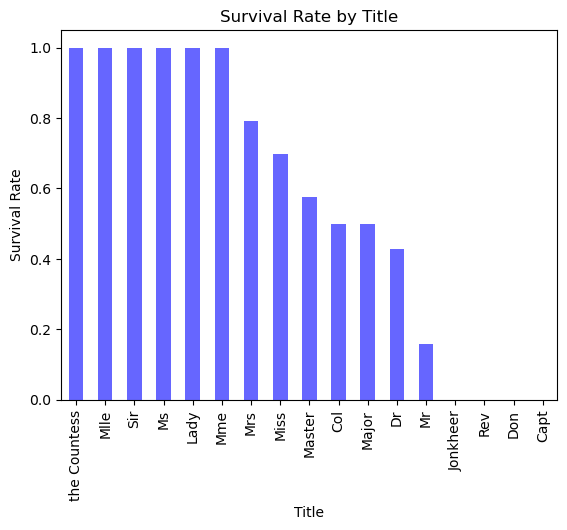

In [823]:

survival_rates = df.groupby('Title')['Survived'].mean()
survival_rates.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6)

plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.show()


People of higher class had a higher survival rate than the lower class.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

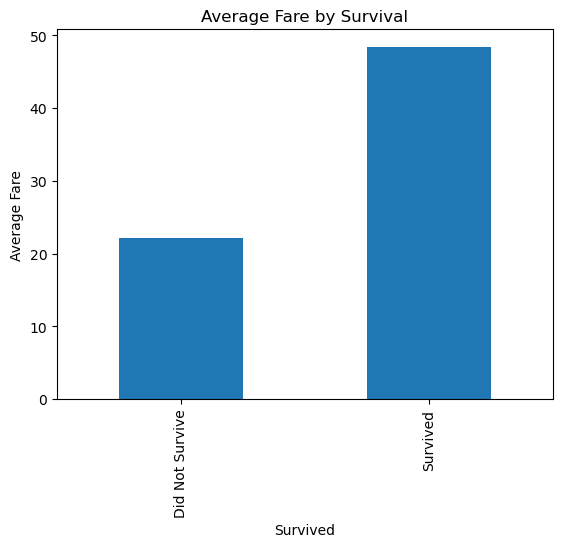

In [824]:

average_fare_by_survival = df.groupby('Survived')['Fare'].mean()
average_fare_by_survival.plot(kind='bar')
plt.title('Average Fare by Survival')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Average Fare')
plt.show()


people with more expensive tickets had a higher proportion of survival than people with cheaper tickets.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

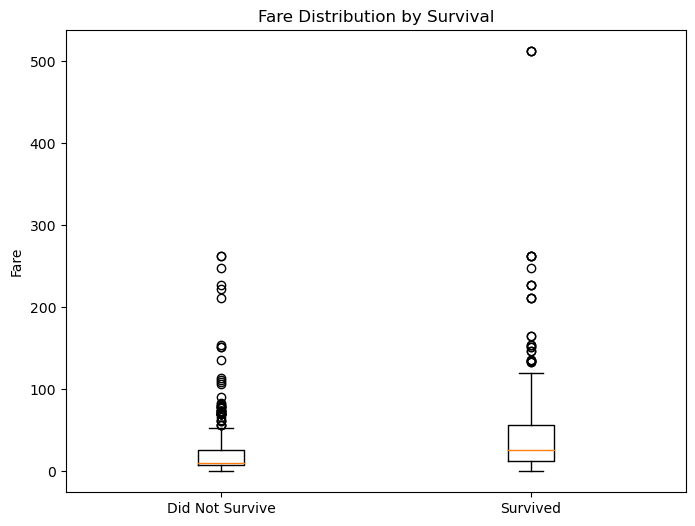

In [825]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Survived'] == 0]['Fare'], df[df['Survived'] == 1]['Fare']], labels=['Did Not Survive', 'Survived'])
plt.title('Fare Distribution by Survival')
plt.ylabel('Fare')
plt.show()


Survivors had a wider inerquartile range in their fare distribution compared to non-survivors, while the fares of non-survivors had a notably greater presence of outliers.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)


In [826]:
# your code here
import pandas as pd

def standardize_fare(df):

    mean_fare = df['Fare'].mean()
    std_fare = df['Fare'].std()
    
    df['Fare_Standardized'] = (df['Fare'] - mean_fare) / std_fare
    
    return df

df = standardize_fare(df)
df[['Fare', 'Fare_Standardized']].head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name,Fare_Standardized
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley (Florence Briggs Thayer),0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath (Lily May Peel),0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry,-0.486064


#### m) Remove all non-numerical columns from the dataframe. - (2 points)



In [827]:
import pandas as pd

df1 = df.copy()
df = df.select_dtypes(include=[int, float])
    
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_Standardized
0,1,0,3,0,22.0,1,0,7.2500,-0.502163
1,2,1,1,1,38.0,1,0,71.2833,0.786404
2,3,1,3,1,26.0,0,0,7.9250,-0.488580
3,4,1,1,1,35.0,1,0,53.1000,0.420494
4,5,0,3,0,35.0,0,0,8.0500,-0.486064


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [828]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))
# def euclidean_distance(cell1, cell2):
#     dist = sum((x-y)**2 for x,y in zip(cell1,cell2))
#     return (dist)**0.5
# def euclidean_distance(row1, row2):
#     return sum((x - y) ** 2 for x, y in zip(row1, row2)) ** 0.5
def N_most_similar_pairs(df, N):
    df.drop("PassengerId", axis = 1, inplace = True)
    
    distances = []
    num_rows = df.shape[0]
    
    print(df)
    # Compute pairwise Euclidean distances
    for i in range(len(df)):
        for j in range(i+1, len(df)):  # j starts from i+1 to avoid duplicate pairs
            dist = euclidean_distance(df.iloc[i], df.iloc[j])
            if dist != 0:  # Ignore identical rows
                distances.append((dist, i, j))
    
    # Sort based on distance
    distances.sort(key=lambda x: x[0])
    print(distances[:3])
    
    pairs = [(item[1], item[2]) for item in distances[:N]]
    
    return pairs
  


print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Fare_Standardized
0           0       3    0  22.0      1      0   7.2500          -0.502163
1           1       1    1  38.0      1      0  71.2833           0.786404
2           1       3    1  26.0      0      0   7.9250          -0.488580
3           1       1    1  35.0      1      0  53.1000           0.420494
4           0       3    0  35.0      0      0   8.0500          -0.486064
..        ...     ...  ...   ...    ...    ...      ...                ...
886         0       2    0  27.0      0      0  13.0000          -0.386454
887         1       1    1  19.0      0      0  30.0000          -0.044356
888         0       3    1   NaN      1      2  23.4500          -0.176164
889         1       1    0  26.0      0      0  30.0000          -0.044356
890         0       3    0  32.0      0      0   7.7500          -0.492101

[891 rows x 8 columns]
[(0.004100830064760185, 111, 578), (0.004100830064760185, 240, 578), (0.0041

## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


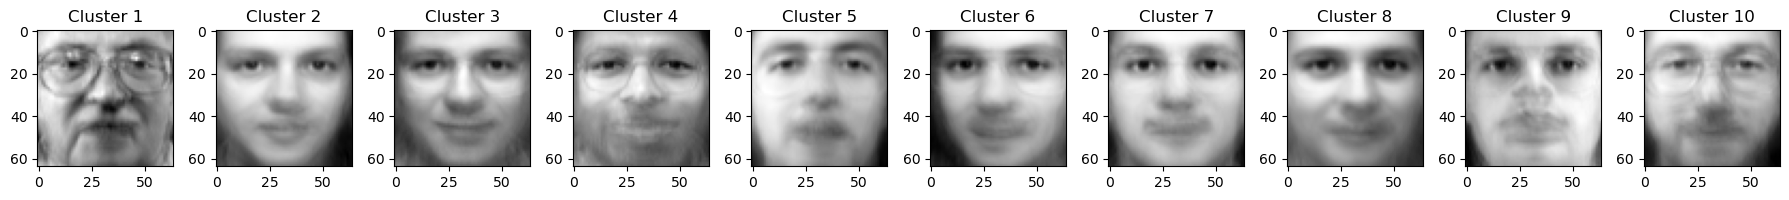

In [829]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces


faces_dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces_dataset.data

kmeans_model = KMeans(n_clusters=10)
kmeans_model.fit(faces_data)

cluster_centers = kmeans_model.cluster_centers_
num_clusters, reshaped_centers = cluster_centers.shape[0], [center.reshape(64, 64) for center in cluster_centers]


plt.figure(figsize=(18, 9))

for x, img_center in enumerate(reshaped_centers):
    plt.subplot(4, 10, x + 1)
    plt.imshow(img_center, cmap=plt.cm.gray)
    plt.title(f"Cluster {x + 1}")


plt.tight_layout()
plt.show()


#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [830]:
from sklearn.metrics import silhouette_score
print(silhouette_score(faces_data,kData.labels_))
print(silhouette_score(faces_data,faces.target))



0.096911564
0.10557363


-> Your answer here

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

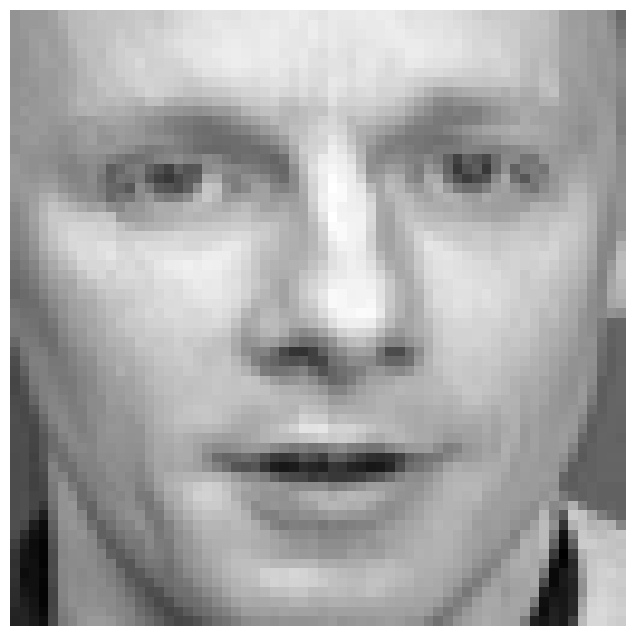

In [831]:
images = faces.images
n_samples = faces_data.shape[0]
i = np.random.randint(0, n_samples)
image = images[i]

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

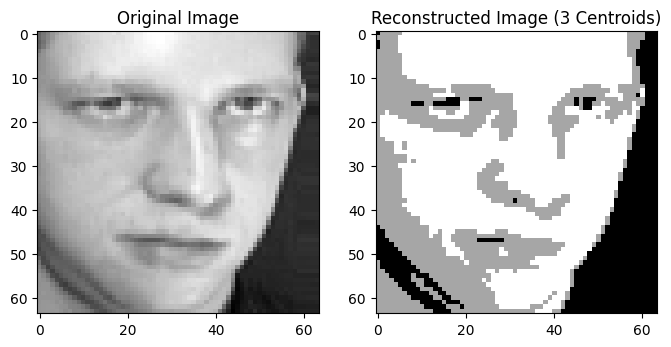

In [832]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


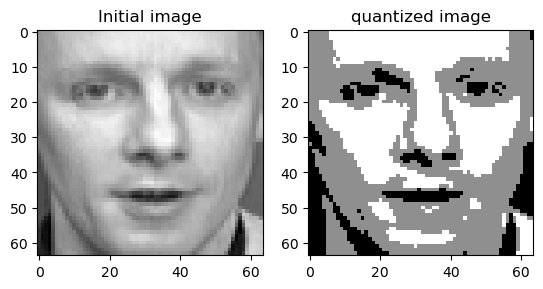

In [833]:
import random
def qim(image,varc):
    newim  = image.reshape(-1, 1) 
    kmeans = KMeans(n_clusters=varc)
    kmeans.fit(newim)
    changedim = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    return changedim
sellim = qim(image, 3)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = plt.cm.gray)
plt.title("Initial image")
plt.subplot(1, 2, 2)
plt.imshow(sellim, cmap=plt.cm.gray)
plt.title("quantized image")
plt.show()



#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


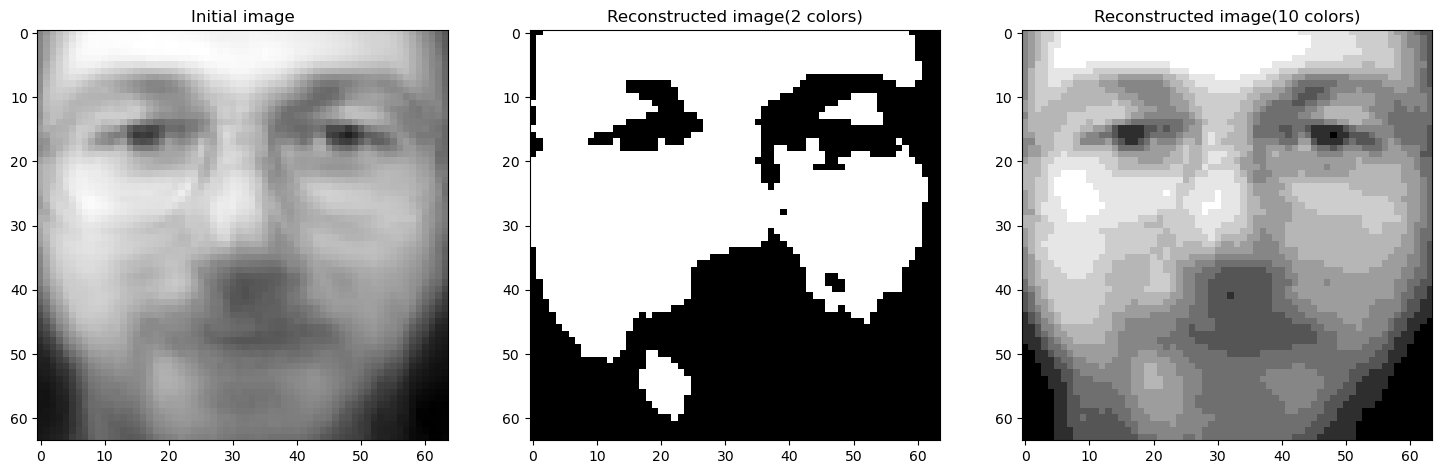

In [834]:
import random
def qim(image,varc):
    newim  = image.reshape(-1, 1) 
    kmeans = KMeans(n_clusters=varc)
    kmeans.fit(newim)
    changedim = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    return changedim

qim2 = qim(img_center, 2)
qim10 = qim(img_center, 10)
plt.figure(figsize=(18, 9))

plt.subplot(1, 3, 1)
plt.imshow(img_center, cmap = plt.cm.gray)
plt.title("Initial image")

plt.subplot(1, 3, 2)
plt.imshow(qim2 , cmap = plt.cm.gray)
plt.title("Reconstructed image(2 colors)")

plt.subplot(1, 3, 3)
plt.imshow(qim10 , cmap = plt.cm.gray)
plt.title("Reconstructed image(10 colors)")

plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

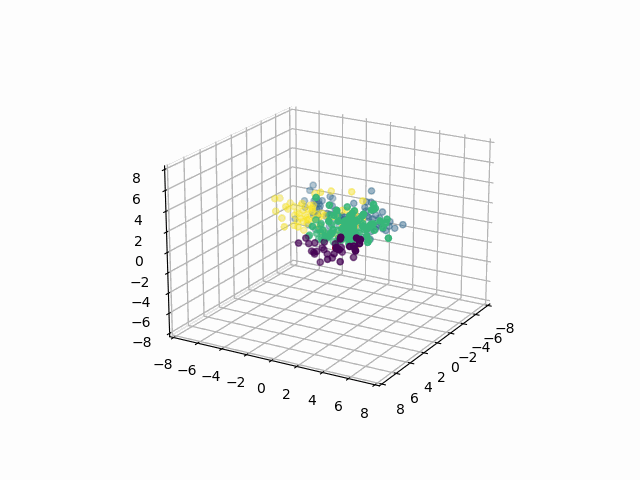

In [835]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets


# Create a 3D dataset around specified centers
centers = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)


class KMeans3D():


   def __init__(self, data, k):
       self.data = data
       self.k = k
       self.assignment = [-1 for _ in range(len(data))]
       self.snaps = []
  
   def snap(self, centers):
       fig = plt.figure()
       ax = fig.add_subplot(111, projection='3d')
       ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=self.assignment)
       ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r')
       ax.view_init(elev=20, azim=30)  # Adjust the view for better visibility
       ax.set_xlim(-8, 8)  # Set appropriate limits for x-axis
       ax.set_ylim(-8, 8)  # Set appropriate limits for y-axis
       ax.set_zlim(-8, 8)  # Set appropriate limits for z-axis
       TEMPFILE = "temp.png"
       fig.savefig(TEMPFILE)
       plt.close(fig)
       self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))


   def initialize(self):
       return self.data[np.random.choice(range(len(self.data)), self.k, replace=False)]
  
   def distance(self, x, y):
       return np.linalg.norm(x - y)
  
   def assign(self, centers):
       for i in range(len(self.data)):
           delta = [float('inf'), 0]
           for j in range(len(centers)):
               distance = self.distance(centers[j], self.data[i])
               if distance < delta[0]:
                   delta[0] = distance
                   delta[1] = j
          
           self.assignment[i] = delta[1]


   def get_centers(self):
       centers = []
       for i in set(self.assignment):
           cluster = []
           for j in range(len(self.data)):
               if self.assignment[j] == i:
                   cluster.append(self.data[j])
           x = 0
           y = 0
           z = 0
           for delta in range(len(cluster)):
               x += cluster[delta][0]
               y += cluster[delta][1]
               z += cluster[delta][2]
           centers.append([x/len(cluster), y/len(cluster), z/len(cluster)])
       return np.array(centers)


   def is_diff_centers(self, centers, new_centers):
       n = len(centers)
       flag = 0
       for i in range(n):
           if not np.all(centers[i] == new_centers[i]):
               flag = 1
       if flag == 1:
           return True
       return False


   def lloyds(self):
       centers = self.initialize()
       self.assign(centers)
       self.snap(centers)
       new_centers = self.get_centers()


       while self.is_diff_centers(centers, new_centers):
           self.assign(new_centers)
           centers = new_centers
           self.snap(centers)
           new_centers = self.get_centers()


kmeans3d = KMeans3D(X, 4)
kmeans3d.lloyds()
images = kmeans3d.snaps


# Save the 3D snapshots as a GIF
images[0].save(
   'kmeans3d.gif',
   optimize=False,
   save_all=True,
   append_images=images[1:],
   loop=0,
   duration=500
)


from IPython.display import Image
Image(filename="kmeans3d.gif")